In [2]:
#importing libs
import math
import pandas_datareader
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [27]:
#Get stock quote
data = yf.download('AAPL', start='2020-01-01', end='2023-05-31')

data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.347954,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.634850,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.213623,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.869293,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.041481,132079200
...,...,...,...,...,...,...
2023-05-23,173.130005,173.380005,171.279999,171.559998,171.559998,50747300
2023-05-24,171.089996,172.419998,170.520004,171.839996,171.839996,45143500
2023-05-25,172.410004,173.899994,171.690002,172.990005,172.990005,56058300


Text(0, 0.5, 'Closing Price USD ($)')

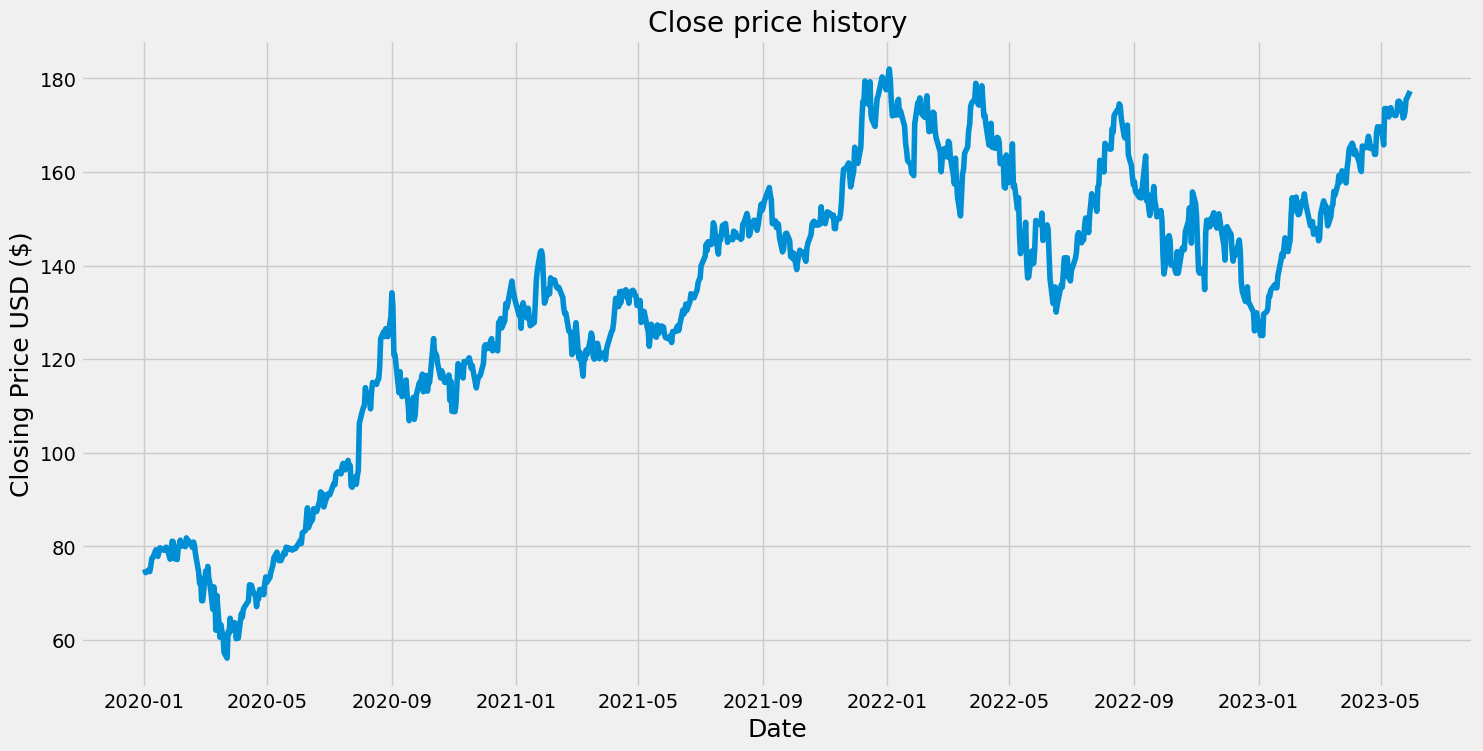

In [28]:
#visualize closing price history
plt.figure(figsize=(16,8))
plt.title("Close price history")
plt.plot(data['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing Price USD ($)', fontsize=18)

In [29]:
#creating new df with 'Close' column
closee = data.filter(['Close'])

#convert to np array
dataset = closee.values

#no of rows to train
training_data_length = math.ceil( len(dataset) *.8 )

training_data_length

687

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

In [32]:
#Create training dataset
#Create Scaled training dataset
train_data = scaled_data[0:training_data_length , :]

#Split data in x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60 : i, 0])
  y_train.append(train_data[i,0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()


[array([0.15085277, 0.14505529, 0.14976075, 0.14696135, 0.15649137,
       0.16927753, 0.17066729, 0.18383068, 0.17533306, 0.17267259,
       0.18041574, 0.18734493, 0.1830564 , 0.18529994, 0.18833764,
       0.18651102, 0.16792745, 0.18528007, 0.19848314, 0.19754999,
       0.16903929, 0.16735166, 0.18758317, 0.19274529, 0.20021045,
       0.18992596, 0.19294378, 0.18909205, 0.2041615 , 0.19953542,
       0.19969428, 0.18788097, 0.19705363, 0.190462  , 0.17606765,
       0.14654436, 0.12649154, 0.13556496, 0.09758373, 0.09726605,
       0.14779519, 0.12895351, 0.15559791, 0.13610106, 0.12837772,
       0.08299089, 0.12105149, 0.1013759 , 0.04737229, 0.1064189 ,
       0.03542004, 0.05656483, 0.04427503, 0.04052257, 0.00966905,
       0.        , 0.04469198, 0.0419918 , 0.06764351, 0.04639945])]
[0.06043640374502146]

[array([0.15085277, 0.14505529, 0.14976075, 0.14696135, 0.15649137,
       0.16927753, 0.17066729, 0.18383068, 0.17533306, 0.17267259,
       0.18041574, 0.18734493, 0.18

In [33]:
#convert x_train, y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [34]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(627, 60, 1)

In [35]:
#Build LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [36]:
#Compile model

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [37]:
#train model

model.fit(x_train, y_train, batch_size = 1, epochs = 1)

627/627 [==============================] - 21s 28ms/step - loss: 0.0057


In [38]:
#Create testing dataset
#Making new array having scaled value from index 1500 to 2100

test_data = scaled_data[training_data_length - 60: , :]

#Creating dataset x_test, y_test

x_test = []
y_test = dataset[training_data_length: , :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [39]:
#Convert data to a numpy array

x_test = np.array(x_test)

In [40]:
#Reshape data to be 3D(for LSTM model)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [41]:
#get models predicted price values for x_test

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #unscaling values


6/6 [==============================] - 1s 16ms/step


In [42]:
#Getting RMSE

RMSE = np.sqrt( np.mean( predictions - y_test)**2 )
RMSE

1.7457492672211943

<ipython-input-45-b01c9ffb5ba1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


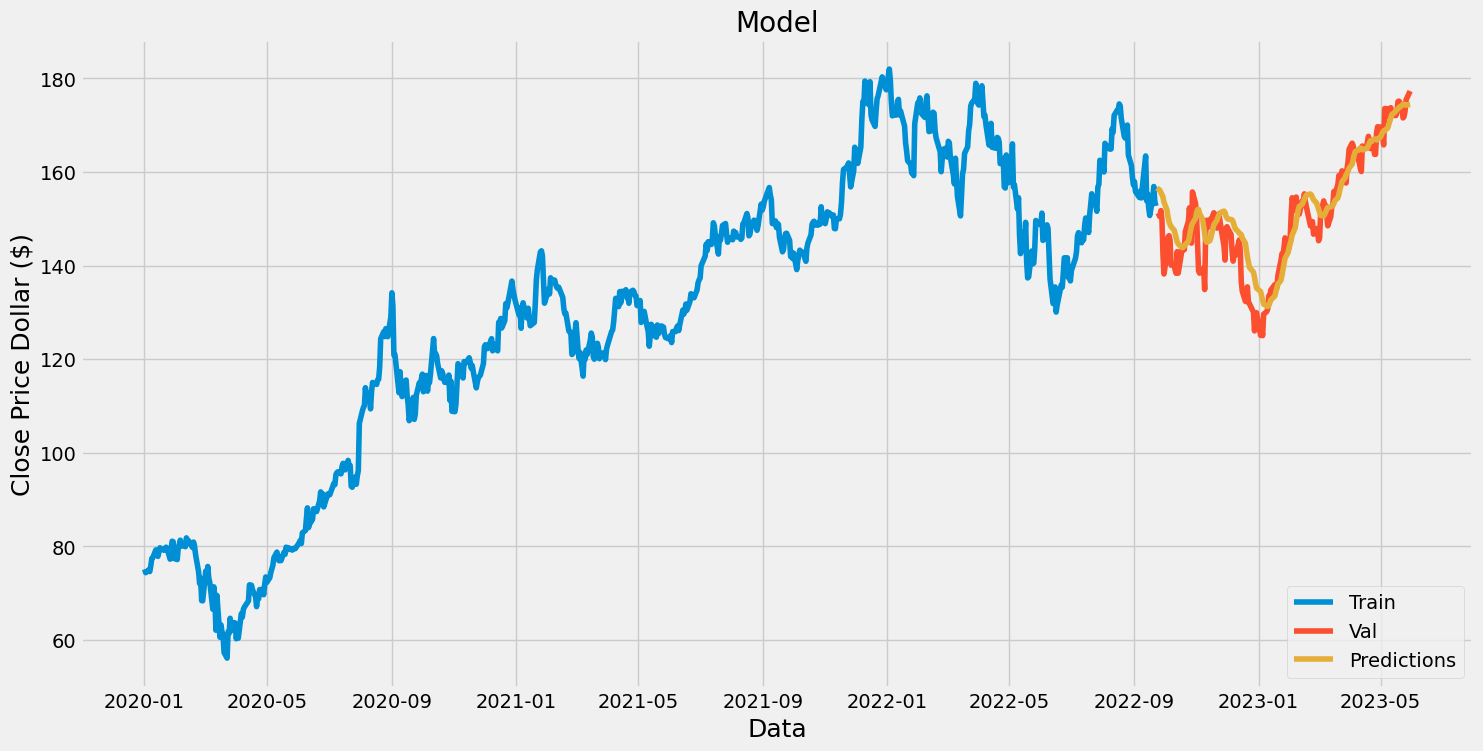

In [45]:
train = data[:training_data_length]
valid = data[training_data_length:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price Dollar ($)', fontsize=18)

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [46]:
#Show valid price vs predicted price

valid

,Open,High,Low,Close,Adj Close,Volume,Predictions
Date,,,,,,,
2022-09-23,151.190002,151.470001,148.559998,150.429993,149.744781,96029900,156.582916
2022-09-26,149.660004,153.770004,149.639999,150.770004,150.083267,93339400,156.103271
2022-09-27,152.740005,154.720001,149.949997,151.759995,151.068741,84442700,155.584015
2022-09-28,147.639999,150.639999,144.839996,149.839996,149.157471,146691400,155.165390
2022-09-29,146.100006,146.720001,140.679993,142.479996,141.831009,128138200,154.666931
...,...,...,...,...,...,...,...
2023-05-23,173.130005,173.380005,171.279999,171.559998,171.559998,50747300,174.496307
2023-05-24,171.089996,172.419998,170.520004,171.839996,171.839996,45143500,174.502380
2023-05-25,172.410004,173.899994,171.690002,172.990005,172.990005,56058300,174.386902


In [56]:
#Get the quote
apple_quote = yf.download('AAPL', start='2020-01-01', end='2023-05-31')

#Create New dataframe
new_df = apple_quote.filter(['Close'])

#Get last 60 day values in array
last_60_days = new_df[-60:].values

#Scale the data to 0 to 1
last_60_days_scaled = scaler.transform(last_60_days)

#Create empty list and append past 60 days data
X_test = []
X_test.append(last_60_days_scaled)

#Convert the X_test dataset to numpy array
X_test = np.array(X_test)

#Reshape data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Get predicted scaled price
pred_price = model.predict(X_test)

#undo scaling
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)


[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 25ms/step
[[174.86592]]


In [57]:
#Get the quote
apple_quote2 = yf.download('AAPL', start='2023-06-01', end='2023-06-02')
print(apple_quote2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2023-06-01    180.089996
Name: Close, dtype: float64
